# Cherry Blossoms!

If we travel back in time, [cherry blossoms](https://en.wikipedia.org/wiki/Cherry_blossom) were once in full bloom! We don't live in Japan or DC, but in non-COVID times we also have the [Brooklyn Botanic Garden's annual festival](https://www.bbg.org/visit/event/sakura_matsuri_2020).

We'll have to make up for it with data-driven cherry blossoms instead. Once upon a time [Data is Plural](https://tinyletter.com/data-is-plural) linked to [a dataset](http://atmenv.envi.osakafu-u.ac.jp/aono/kyophenotemp4/) about when the cherry trees blossom each year. It's completely out of date, but it's quirky in a real nice way so we're sticking with it.

## 0. Do all of your importing/setup stuff

In [385]:
import pandas as pd

## 1. Read in the file using pandas, and look at the first five rows

* *Tip: You will probably need to pip install something to make this Excel file work!*

In [386]:
# pip install xlrd
df = pd.read_excel("KyotoFullFlower7.xls")
#pd.read_excel(filepath, dtype={'Full-flowering date': str})--> turn this column to string at the very beginning!!

df.head(30)

,"Full-flowering dates of Japanese cherry (Prunus jamasakura) at Kyoto, Japan. (Latest version, Jun. 12, 2012)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,This phenological data was acquired by followi...,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Column A; A.D.,NaN,NaN,NaN,NaN,NaN
3,Column B; Full-flowering date (day of year).,NaN,NaN,NaN,NaN,NaN
4,"Column C; Full-flowering date (calender date, ...",NaN,NaN,NaN,NaN,NaN
5,Column D; Source code,NaN,NaN,NaN,NaN,NaN
6,"1; Reported by Taguchi (1939), J. Marine Mete...",NaN,NaN,NaN,NaN,NaN
7,"2; Added by Sekiguchi (1969), Tokyo Geography...",NaN,NaN,NaN,NaN,NaN
8,"3; Added by Aono and Omoto (1994), J. Agric. ...",NaN,NaN,NaN,NaN,NaN
9,"4; Added by Aono and Kazui (2008), Int. J. Cl...",NaN,NaN,NaN,NaN,NaN


## 2. Read in the file using pandas CORRECTLY, and look at the first five rows

Hrm, how do your column names look? Read the file in again but this time add **a parameter to make sure your columns look right**. How can you tell pandas to skip rows?

**TIP: The first year should be 801 AD, and it should not have any dates or anything.**

In [387]:
# header = 25 --> the row numbers that the computer starts to read from
df = pd.read_excel("KyotoFullFlower7.xls",header=25)
df.head()

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
0,801,NaN,NaN,NaN,NaN,-
1,802,NaN,NaN,NaN,NaN,-
2,803,NaN,NaN,NaN,NaN,-
3,804,NaN,NaN,NaN,NaN,-
4,805,NaN,NaN,NaN,NaN,-


## 3. Look at the final five rows of the data

In [388]:
df.tail()

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
1210,2011,99.0,409.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1211,2012,101.0,410.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1212,2013,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1213,2014,94.0,404.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1214,2015,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)


## 4. Add some NaN values

It looks like you should have NaN/missing values in the beginning of the dataset under "Reference name." Read in the file *one more time*, this time making sure all of those missing reference names actually show up as `NaN` instead of `-`.

* *Tip: it's another open with reading in the file!*

In [389]:
df = pd.read_excel("KyotoFullFlower7.xls",header=25, na_values="-")
df

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
0,801,NaN,NaN,NaN,NaN,NaN
1,802,NaN,NaN,NaN,NaN,NaN
2,803,NaN,NaN,NaN,NaN,NaN
3,804,NaN,NaN,NaN,NaN,NaN
4,805,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
1210,2011,99.0,409.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1211,2012,101.0,410.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1212,2013,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1213,2014,94.0,404.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)


## 5. What reference is the most commonly used when figuring out cherry blossom flowering dates?

If the first result is `"-"`, you need to redo the last question.

In [390]:
df.columns = df.columns.str.lower().str.replace(" ", "_").str.replace("-", "_").str.replace("(", "_").str.replace(")", "_")
df.reference_name.value_counts()

/var/folders/jg/7jsjjz6d6g5cxdkqkqxtc68w0000gn/T/ipykernel_61036/2338116807.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.lower().str.replace(" ", "_").str.replace("-", "_").str.replace("(", "_").str.replace(")", "_")
/var/folders/jg/7jsjjz6d6g5cxdkqkqxtc68w0000gn/T/ipykernel_61036/2338116807.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.lower().str.replace(" ", "_").str.replace("-", "_").str.replace("(", "_").str.replace(")", "_")


NEWS-PAPER(ARASHIYAMA)        94
SUGIURAKE-NIKKI               38
MYOHOIN-HINAMIKI              32
OYUDONONO-UENO-NIKKI          26
OYUDONONO-UENO-NIKKI [EDA]    21
                              ..
GONARAIN-GYOSEI-BASSHO         1
MORIMITSU-KOKI                 1
SANKAIKI                       1
TSUKIMOUDE-WAKASHU(PART-3)     1
NEWS-PAPET(DAIGO-JI)           1
Name: reference_name, Length: 222, dtype: int64

## 6. Filter the list to only include columns where the `Full-flowering date (DOY)` is not missing

In [391]:
# Drop rows that has NaN values on selected columns
df = df.dropna(subset=['full_flowering_date__doy_'])
df

,ad,full_flowering_date__doy_,full_flowering_date,source_code,data_type_code,reference_name
11,812,92.0,401.0,1.0,2.0,NIHON-KOKI
14,815,105.0,415.0,1.0,2.0,NIHON-KOKI
30,831,96.0,406.0,1.0,2.0,NIHON-KOKI
50,851,108.0,418.0,1.0,2.0,MONTOKUTENNO-JITSUROKU
52,853,104.0,414.0,1.0,2.0,MONTOKUTENNO-JITSUROKU
...,...,...,...,...,...,...
1210,2011,99.0,409.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1211,2012,101.0,410.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1212,2013,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1213,2014,94.0,404.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)


## 6.5 Confirm you now have 827 rows

In [392]:
df.shape

(827, 6)

## 7. Make a histogram of the full-flowering date

<AxesSubplot:>

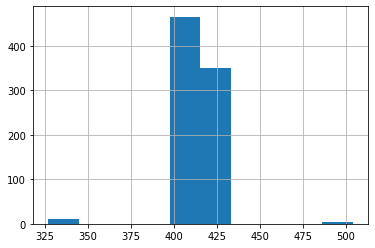

In [393]:
df.full_flowering_date.hist()

## 8. Make another histogram of the full-flowering date, but with 39 bins instead of 10

<AxesSubplot:>

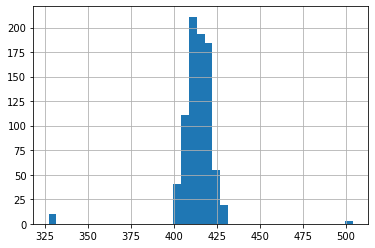

In [394]:
df.full_flowering_date.hist(bins=39)

## 9. What's the average number of days it takes for the flowers to blossom? And how many records do we have?

Answer these both with one line of code.

In [395]:
df.full_flowering_date__doy_.describe()

count    827.000000
mean     104.540508
std        6.407036
min       86.000000
25%      100.000000
50%      105.000000
75%      109.000000
max      124.000000
Name: full_flowering_date__doy_, dtype: float64

## 10. What's the average days into the year cherry flowers normally blossomed before 1900?



In [396]:
df[df.ad < 1900].groupby(by='ad').full_flowering_date__doy_.mean()

ad
812      92.0
815     105.0
831      96.0
851     108.0
853     104.0
        ...  
1894     98.0
1896    106.0
1897    106.0
1898    108.0
1899     99.0
Name: full_flowering_date__doy_, Length: 714, dtype: float64

## 11. How about after 1900?

In [397]:
df[df.ad >= 1900].groupby(by='ad').full_flowering_date__doy_.mean()

ad
1900    102.0
1901    102.0
1902     98.0
1903     99.0
1904    108.0
        ...  
2011     99.0
2012    101.0
2013     93.0
2014     94.0
2015     93.0
Name: full_flowering_date__doy_, Length: 113, dtype: float64

## 12. How many times was our data from a title in Japanese poetry?

You'll need to read the documentation inside of the Excel file.

In [398]:
df.data_type_code.value_counts()
# Data type code
# digit 4 represents: title in Japanese poety
# so 39 times the data was from a title in Japanese poetry.

2.0    454
1.0    166
0.0    124
4.0     39
3.0     30
8.0     11
9.0      3
Name: data_type_code, dtype: int64

## 13. Display the rows where our data was from a title in Japanese poetry

In [399]:
df[df.data_type_code == 4.0]
# be careful with data_type_code's dtypes --> int

,ad,full_flowering_date__doy_,full_flowering_date,source_code,data_type_code,reference_name
90,891,109.0,419.0,5.0,4.0,NIHONKIRYAKU
94,895,104.0,414.0,5.0,4.0,NIHONKIRYAKU
95,896,104.0,413.0,5.0,4.0,NIPPON-SANDAI-JITSUROKU
122,923,104.0,414.0,5.0,4.0,ZOKU-KOKIN-WAKASHU
154,955,89.0,330.0,5.0,4.0,SHUISHO
168,969,98.0,408.0,5.0,4.0,NIHONKIRYAKU
206,1007,106.0,416.0,5.0,4.0,MIDO-KAMPAKUKI
232,1033,102.0,412.0,5.0,4.0,NIHONKIRYAKU
235,1036,104.0,413.0,5.0,4.0,NIHONKIRYAKU
259,1060,108.0,417.0,5.0,4.0,SHIN-SENZAI-WAKASHU


## 14. Graph the full-flowering date (DOY) over time

<AxesSubplot:>

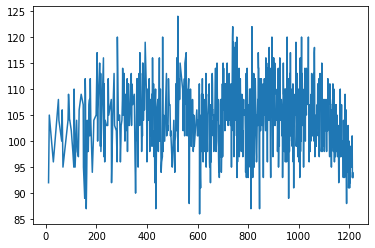

In [400]:
df.full_flowering_date__doy_.plot()

## 15. Smooth out the graph

It's so jagged! You can use `df.rolling` to calculate a rolling average.

The following code calculates a **10-year mean**, using the `AD` column as the anchor. If there aren't 20 samples to work with in a row, it'll accept down to 5. Neat, right?

(We're only looking at the final 5)

In [401]:
df.rolling(10, on='ad', min_periods=5)['full_flowering_date__doy_'].mean().tail()

1210    95.9
1211    96.9
1212    96.4
1213    96.6
1214    96.0
Name: full_flowering_date__doy_, dtype: float64

/var/folders/jg/7jsjjz6d6g5cxdkqkqxtc68w0000gn/T/ipykernel_61036/1901569943.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["rolling_date"] = df.rolling(20, on='ad', min_periods=5)['full_flowering_date__doy_'].mean()
/var/folders/jg/7jsjjz6d6g5cxdkqkqxtc68w0000gn/T/ipykernel_61036/1901569943.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["AD_int"] = df.ad.astype(int)


<AxesSubplot:xlabel='AD_int'>

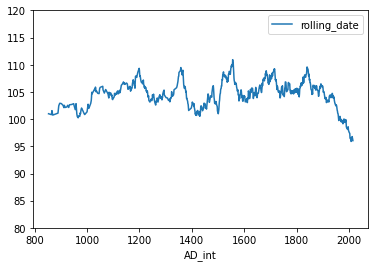

In [402]:
df["rolling_date"] = df.rolling(20, on='ad', min_periods=5)['full_flowering_date__doy_'].mean()
df["AD_int"] = df.ad.astype(int)
df.plot(y="rolling_date",x="AD_int",ylim=(80, 120))

Use the code above to create a new column called `rolling_date` in our dataset. It should be the 20-year rolling average of the flowering date. Then plot it, with the year on the x axis and the day of the year on the y axis.

Try adding `ylim=(80, 120)` to your `.plot` command to make things look a little less dire.

## 16. Add a month column

Right now the "Full-flowering date" column is pretty rough. It uses numbers like '402' to mean "April 2nd" and "416" to mean "April 16th." Let's make a column to explain what month it happened in.

* Every row that happened in April should have 'April' in the `month` column.
* Every row that happened in March should have 'March' as the `month` column.
* Every row that happened in May should have 'May' as the `month` column.

There are **at least two ways to do this.**

#### WAY ONE: The bad-yet-simple way

If you don't want to use `pd.to_datetime`, you can use this as an sample for updating March. It finds everything with a date less than 400 and assigns `March` to the `month` column:

```python
df.loc[df['Full-flowering date'] < 400, 'month'] = 'March'
```

#### WAY TWO: The good-yet-complicated way

* When you use `pd.to_datetime`, if pandas doesn't figure it out automatically you can also pass a `format=` argument that explains what the format is of the datetime. You use [the codes here](https://strftime.org/) to mark out where the days, months, etc are. For example, `2020-04-09` would be converted using `pd.to_datetime(df.colname, "format='%Y-%m-%d")`.
* `errors='coerce'` will return `NaN` for missing values. By default it just yells "I don't know what to do!!!"
* And remember how we used `df.date_column.dt.month` to get the number of the month? For the name, you use `dt.strftime` (string-formatted-time), and pass it [the same codes](https://strftime.org/) to tell it what to do. For example, `df.date_column.dt.strftime("%Y-%m-%d")` would give you `"2020-04-09"`.

In [403]:
#WAY ONE: The bad-yet-simple way
df.loc[df['full_flowering_date'] < 400, 'month'] = 'March'
df.loc[(df['full_flowering_date'] < 500) & (df['full_flowering_date'] > 331), 'month'] = 'April'
df.loc[df['full_flowering_date'] > 500, 'month'] = 'May'

/var/folders/jg/7jsjjz6d6g5cxdkqkqxtc68w0000gn/T/ipykernel_61036/201732084.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['full_flowering_date'] < 400, 'month'] = 'March'


In [404]:
# WAY TWO: The good-yet-complicated way

df.full_flowering_date = df.full_flowering_date.astype(int)
df.full_flowering_date = df.full_flowering_date.astype(str)
df["month2.0"] = pd.to_datetime(df.full_flowering_date,format='%m%d').dt.month_name()
df

# create another column named "month2.0" to show WAY TWO.
## Does I have to convert float to integers first so that I can use datetime function? 
## You'd better convert it to string!! rather than integers (but why integers here work? By chance possibly!)

/var/folders/jg/7jsjjz6d6g5cxdkqkqxtc68w0000gn/T/ipykernel_61036/2203499449.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.full_flowering_date = df.full_flowering_date.astype(int)
/var/folders/jg/7jsjjz6d6g5cxdkqkqxtc68w0000gn/T/ipykernel_61036/2203499449.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.full_flowering_date = df.full_flowering_date.astype(str)
/var/folders/jg/7jsjjz6d6g5cxdkqkqxtc68w0000gn/T/ipykernel_61036/2203499449.py:5: SettingWithCopyWarning: 
A value is trying to be set o

,ad,full_flowering_date__doy_,full_flowering_date,source_code,data_type_code,reference_name,rolling_date,AD_int,month,month2.0
11,812,92.0,401,1.0,2.0,NIHON-KOKI,NaN,812,April,April
14,815,105.0,415,1.0,2.0,NIHON-KOKI,NaN,815,April,April
30,831,96.0,406,1.0,2.0,NIHON-KOKI,NaN,831,April,April
50,851,108.0,418,1.0,2.0,MONTOKUTENNO-JITSUROKU,NaN,851,April,April
52,853,104.0,414,1.0,2.0,MONTOKUTENNO-JITSUROKU,101.00,853,April,April
...,...,...,...,...,...,...,...,...,...,...
1210,2011,99.0,409,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.45,2011,April,April
1211,2012,101.0,410,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.80,2012,April,April
1212,2013,93.0,403,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.60,2013,April,April
1213,2014,94.0,404,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.35,2014,April,April


## 17. Using your new column, how many blossomings happened in each month?

In [405]:
df.month.value_counts()

April    814
March     10
May        3
Name: month, dtype: int64

## 18. Make a bar graph of how many blossomings happened in each month.

<AxesSubplot:>

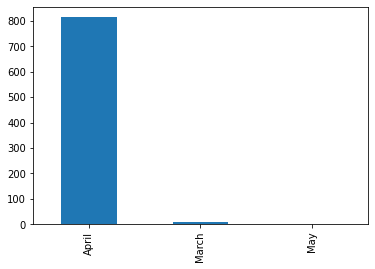

In [406]:
df.month.value_counts().plot(kind="bar")

## 19. Adding a day-of-month column

Now we're going to add a new column called `day_of_month.`

*Tip: If you didn't drop the rows missing full-flowering dates earlier, it will yell at you about missing data. Go back up and fix Number 6!*

In [407]:
#df["day_of_month"] = pd.to_datetime(df.full_flowering_date,format='%m%d').dt.#how to only output the day without the month??

df["day_of_month"] = pd.to_datetime(df.full_flowering_date,format='%m%d').dt.strftime("%d")
df

/var/folders/jg/7jsjjz6d6g5cxdkqkqxtc68w0000gn/T/ipykernel_61036/4107961568.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["day_of_month"] = pd.to_datetime(df.full_flowering_date,format='%m%d').dt.strftime("%d")


,ad,full_flowering_date__doy_,full_flowering_date,source_code,data_type_code,reference_name,rolling_date,AD_int,month,month2.0,day_of_month
11,812,92.0,401,1.0,2.0,NIHON-KOKI,NaN,812,April,April,01
14,815,105.0,415,1.0,2.0,NIHON-KOKI,NaN,815,April,April,15
30,831,96.0,406,1.0,2.0,NIHON-KOKI,NaN,831,April,April,06
50,851,108.0,418,1.0,2.0,MONTOKUTENNO-JITSUROKU,NaN,851,April,April,18
52,853,104.0,414,1.0,2.0,MONTOKUTENNO-JITSUROKU,101.00,853,April,April,14
...,...,...,...,...,...,...,...,...,...,...,...
1210,2011,99.0,409,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.45,2011,April,April,09
1211,2012,101.0,410,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.80,2012,April,April,10
1212,2013,93.0,403,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.60,2013,April,April,03
1213,2014,94.0,404,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.35,2014,April,April,04


## 20. Adding a date column

If you don't have a nice-looking date column yet, take the `'month'` and `'day_of_month'` columns and combine them in order to create a new column called `'date'`. By "nice looking," I mean it should say something like `April 11`.

* Instead of using the two existing columns, you could learn to use `.dt.strftime` as mentioned above.

In [408]:
df["ad"] = df.ad.astype(str)
df["date"] = df["ad"] + " " + df['month'] + " " + df['day_of_month']
df

/var/folders/jg/7jsjjz6d6g5cxdkqkqxtc68w0000gn/T/ipykernel_61036/284425002.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["ad"] = df.ad.astype(str)
/var/folders/jg/7jsjjz6d6g5cxdkqkqxtc68w0000gn/T/ipykernel_61036/284425002.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["date"] = df["ad"] + " " + df['month'] + " " + df['day_of_month']


,ad,full_flowering_date__doy_,full_flowering_date,source_code,data_type_code,reference_name,rolling_date,AD_int,month,month2.0,day_of_month,date
11,812,92.0,401,1.0,2.0,NIHON-KOKI,NaN,812,April,April,01,812 April 01
14,815,105.0,415,1.0,2.0,NIHON-KOKI,NaN,815,April,April,15,815 April 15
30,831,96.0,406,1.0,2.0,NIHON-KOKI,NaN,831,April,April,06,831 April 06
50,851,108.0,418,1.0,2.0,MONTOKUTENNO-JITSUROKU,NaN,851,April,April,18,851 April 18
52,853,104.0,414,1.0,2.0,MONTOKUTENNO-JITSUROKU,101.00,853,April,April,14,853 April 14
...,...,...,...,...,...,...,...,...,...,...,...,...
1210,2011,99.0,409,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.45,2011,April,April,09,2011 April 09
1211,2012,101.0,410,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.80,2012,April,April,10,2012 April 10
1212,2013,93.0,403,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.60,2013,April,April,03,2013 April 03
1213,2014,94.0,404,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.35,2014,April,April,04,2014 April 04


## 21. What day of the week do cherry blossoms like to blossom on?

Do they get the weekends off?

In [409]:
# pd.Timestamp.min = '800-01-01 00:00:00'
# pd.Timestamp.max = '2200-01-01 00:00:00'

In [410]:
pd.to_datetime(df.date).dt.day_of_week()
# date range built-in issue ---> skip this question!

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 812-04-01 00:00:00

# YOU ARE DONE.

And **incredible.**